In [8]:
from astrodb_utils import load_astrodb, AstroDBError
from simple.utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import add_missing_keywords, add_wavelength_keywords, check_header
from astropy.io import fits
import astropy.units as u
import os
import numpy as np
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region, snr_threshold

In [2]:
path = "/Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files"
print(os.path.exists(os.path.join(path,"SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt")))


True


In [ ]:
# Handle txt files first separately
file_plotted = 0
file_failed = 0
for filename in os.listdir(path):
    if filename.endswith(".fits") or filename.startswith("README"):
        # print(f"SKIPPING FITS file: {filename}")
        continue
    
    print(f"Reading text file: {filename}")

    file_path = os.path.join(path, filename)
    
    try:
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        # column1: #w         column2:flux          
        if (filename == "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"):
            wavelength = (data[:, 0] * u.AA).to(u.um)
            flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

        # column1: #w (micron)         column2:flux          
        else:
            wavelength = (data[:, 0] * u.um)
            flux = data[:, 1] * (u.watt / u.micron/ (u.meter**2)) # Flux(lambda) in W/um/m2
        # check plottability
        spectrum = Spectrum(spectral_axis=wavelength, flux=flux)
        spectrum = extract_region(spectrum, SpectralRegion(0.4*u.um, 2.4*u.um))
        check_spectrum_plottable(spectrum, show_plot=True)
        file_plotted += 1
    
    except Exception as e:
        print(f"Could not read {filename}: {e}")
        file_failed += 1
print(f"Total files plotted: {file_plotted}")


READING FITS file: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5403.447981095367 Angstrom - 10195.708446603123 Angstrom
PLOTTABLE file name: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.000009536744 Angstrom - 10195.122075080872 Angstrom
P

flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5404.498589515689 Angstrom - 10199.999939918522 Angstrom
PLOTTABLE file name: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.000009536748 Angstrom - 10195.122075080875 Angstrom
PLOTTABLE file name: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_su

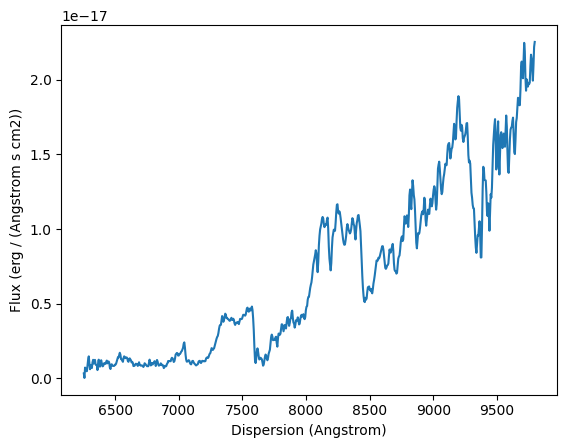

wavelenth range: 6253.0823497772235 Angstrom - 9797.793899536135 Angstrom
READING FITS file: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5404.399250030519 Angstrom - 10150.00008773804 Angstrom
PLOTTABLE file name: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wave

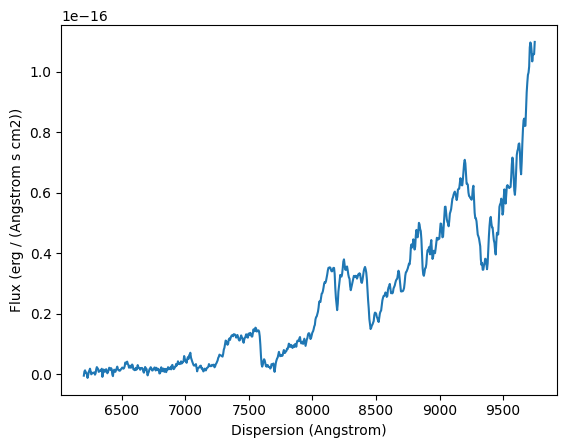

wavelenth range: 6200.678857695102 Angstrom - 9749.27423139616 Angstrom
READING FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.284349441525 Angstrom - 10149.999861717217 Angstrom
PLOTTABLE file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 54

In [21]:
# Only do OSIRIS FITS files

file_read = 0
file_plotted = 0
file_failed = 0

for filename in os.listdir(path):
    if not filename.endswith("fits") or "OSIRIS" not in filename:
        #print(f"SKIPPING FITS file: {filename}")
        continue
    else:
        print(f"READING FITS file: {filename}")
    
    file_path = os.path.join(path, filename)
    print(f"File path: {file_path}")

    # Read the FITS file
    #with fits.open(file_path, mode="update") as filehandle:
    #    unit_string =  "erg / (angstrom s cm2)"
    #    print(f"REPLACING {filehandle[0].header['BUNIT']} with {unit_string}")
    #    filehandle[0].header["BUNIT"] = unit_string

    try:
        spectrum = Spectrum.read(file_path) #format="wcs1d-fits") #, flux_unit=u.Unit("erg / (angstrom s cm2)"))
        spectrum = extract_region(spectrum, SpectralRegion(0.54*u.um, 1.02*u.um))
         
        print(f"flux unit: {spectrum.flux.unit}")
        #if u.get_physical_type(spectrum.flux.unit) == "unknown": 
        #    spectrum.flux = spectrum.flux * u.Unit("erg / (angstrom s cm2)")  # Convert flux to erg/cm^2/s/A
        print(f"flux unit: {u.get_physical_type(spectrum.flux.unit)}, wave unit: {spectrum.spectral_axis.unit}")
        file_read +=1
    except Exception as e:
        file_failed += 1
        raise e

    # Plot and check
    try:
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=False)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")
        print(f"PLOTTABLE file name: {filename} \n")
        file_plotted += 1
    except Exception as e:
        file_failed += 1
        raise e

    if filename == "ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits":
        spectrum = extract_region(spectrum, SpectralRegion(0.625*u.um, 0.98*u.um))
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=True)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")

    if filename == "ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits":
        spectrum = extract_region(spectrum, SpectralRegion(0.62*u.um, 0.975*u.um))
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=True)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")

   

print(f"\nTotal files read into Spectrum objects: {file_read}")
print(f"Total files plotted: {file_plotted}")
print(f"Total files failed: {file_failed}")

#Problems

